In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq

In [4]:
adata = sc.read_10x_h5(
    filename="ZB4171/Xenium_V1_FFPE_TgCRND8_17_9_months_outs/cell_feature_matrix.h5"
)

In [5]:
adata

AnnData object with n_obs × n_vars = 62268 × 347
    var: 'gene_ids', 'feature_types', 'genome'

In [6]:
df = pd.read_csv(
    "ZB4171/Xenium_V1_FFPE_TgCRND8_17_9_months_outs/cells.csv.gz", compression="gzip"
)

In [7]:
df

cell_id   x_centroid   y_centroid  transcript_counts  \
0      aaabiggh-1   831.785336   755.803772                554   
1      aaacfoel-1   821.733453   768.910446                291   
2      aaaeefil-1   831.932053   780.367651                220   
3      aaaehidd-1   853.614108   774.764157               1029   
4      aaagcbkg-1   821.639603   799.171515                453   
...           ...          ...          ...                ...   
62263  oindmjog-1  5068.380664  4446.804883                 35   
62264  oinecaba-1  5072.841504  4459.385132                124   
62265  oinehfmf-1  5251.196240  4366.193091                 15   
62266  oinemiil-1  5248.493506  4382.190356                 22   
62267  oingfoec-1  5272.023315  4387.369629                 18   

       control_probe_counts  control_codeword_counts  \
0                         0                        0   
1                         0                        0   
2                         1                        0   
3                         0                        0   
4                         0                        0   
...                     ...                      ...   
62263                     0                        0   
62264                     0                        0   
62265                     0                        0   
62266                     0                        0   
62267                     0                        0   

       unassigned_codeword_counts  total_counts   cell_area  nucleus_area  
0                               0           554  509.091563     65.386250  
1                               0           291  275.498281     36.982969  
2                               0           221  261.635312     15.849844  
3                               0          1029  818.547344    129.056563  
4                               1           454  522.232031     96.002188  
...                           ...           ...         ...           ...  
62263                           0            35  229.709844     15.985312  
62264                           0           124  359.353438     18.423750  
62265                           0            15  686.329844     24.745625  
62266                           0            22  333.478906     20.681562  
62267                           0            18  750.948438      9.798906  

[62268 rows x 10 columns]

In [8]:
df.set_index(adata.obs_names, inplace=True)
adata.obs = df.copy()

In [9]:
adata.obsm["spatial"] = adata.obs[["x_centroid", "y_centroid"]].copy().to_numpy()

In [10]:
adata.obs

cell_id   x_centroid   y_centroid  transcript_counts  \
aaabiggh-1  aaabiggh-1   831.785336   755.803772                554   
aaacfoel-1  aaacfoel-1   821.733453   768.910446                291   
aaaeefil-1  aaaeefil-1   831.932053   780.367651                220   
aaaehidd-1  aaaehidd-1   853.614108   774.764157               1029   
aaagcbkg-1  aaagcbkg-1   821.639603   799.171515                453   
...                ...          ...          ...                ...   
oindmjog-1  oindmjog-1  5068.380664  4446.804883                 35   
oinecaba-1  oinecaba-1  5072.841504  4459.385132                124   
oinehfmf-1  oinehfmf-1  5251.196240  4366.193091                 15   
oinemiil-1  oinemiil-1  5248.493506  4382.190356                 22   
oingfoec-1  oingfoec-1  5272.023315  4387.369629                 18   

            control_probe_counts  control_codeword_counts  \
aaabiggh-1                     0                        0   
aaacfoel-1                     0                        0   
aaaeefil-1                     1                        0   
aaaehidd-1                     0                        0   
aaagcbkg-1                     0                        0   
...                          ...                      ...   
oindmjog-1                     0                        0   
oinecaba-1                     0                        0   
oinehfmf-1                     0                        0   
oinemiil-1                     0                        0   
oingfoec-1                     0                        0   

            unassigned_codeword_counts  total_counts   cell_area  nucleus_area  
aaabiggh-1                           0           554  509.091563     65.386250  
aaacfoel-1                           0           291  275.498281     36.982969  
aaaeefil-1                           0           221  261.635312     15.849844  
aaaehidd-1                           0          1029  818.547344    129.056563  
aaagcbkg-1                           1           454  522.232031     96.002188  
...                                ...           ...         ...           ...  
oindmjog-1                           0            35  229.709844     15.985312  
oinecaba-1                           0           124  359.353438     18.423750  
oinehfmf-1                           0            15  686.329844     24.745625  
oinemiil-1                           0            22  333.478906     20.681562  
oingfoec-1                           0            18  750.948438      9.798906  

[62268 rows x 10 columns]

In [11]:
adata.to_df()

2010300C02Rik  Abca7  Acsbg1  Acta2  Acvrl1  Adamts2  Adamtsl1  \
aaabiggh-1            4.0    2.0     1.0    0.0     0.0      0.0       0.0   
aaacfoel-1            0.0    0.0     1.0    0.0     0.0      0.0       0.0   
aaaeefil-1            0.0    0.0     5.0    0.0     0.0      0.0       0.0   
aaaehidd-1            6.0    2.0     3.0    0.0     0.0      1.0       0.0   
aaagcbkg-1            2.0    3.0     1.0    0.0     0.0      0.0       0.0   
...                   ...    ...     ...    ...     ...      ...       ...   
oindmjog-1            0.0    0.0     0.0    0.0     0.0      0.0       1.0   
oinecaba-1            1.0    0.0     0.0    0.0     0.0      0.0       0.0   
oinehfmf-1            0.0    0.0     0.0    0.0     0.0      0.0       0.0   
oinemiil-1            0.0    0.0     0.0    0.0     0.0      0.0       0.0   
oingfoec-1            0.0    0.0     0.0    0.0     0.0      0.0       0.0   

            Adgrl4  Aldh1a2  Aldh1l1  ...  Unc13c  Vat1l  Vcan  Vim  Vip  \
aaabiggh-1     0.0      0.0      0.0  ...     0.0    4.0   0.0  0.0  0.0   
aaacfoel-1     0.0      0.0      2.0  ...     0.0    0.0   0.0  1.0  0.0   
aaaeefil-1     0.0      0.0      0.0  ...     1.0    0.0   0.0  0.0  0.0   
aaaehidd-1     1.0      0.0      0.0  ...     0.0    8.0   0.0  1.0  0.0   
aaagcbkg-1     1.0      0.0      3.0  ...     0.0    2.0   0.0  3.0  0.0   
...            ...      ...      ...  ...     ...    ...   ...  ...  ...   
oindmjog-1     0.0      0.0      0.0  ...     0.0    0.0   0.0  2.0  0.0   
oinecaba-1     0.0      3.0      0.0  ...     0.0    0.0   0.0  1.0  0.0   
oinehfmf-1     0.0      0.0      0.0  ...     0.0    0.0   0.0  0.0  0.0   
oinemiil-1     0.0      1.0      0.0  ...     0.0    0.0   0.0  0.0  0.0   
oingfoec-1     0.0      0.0      0.0  ...     0.0    0.0   0.0  1.0  0.0   

            Vwc2l  Wfs1  Zfp366  Zfp536  Zfpm2  
aaabiggh-1    3.0   0.0     0.0     0.0    1.0  
aaacfoel-1    2.0   0.0     0.0     0.0    1.0  
aaaeefil-1    0.0   1.0     0.0     0.0    2.0  
aaaehidd-1    4.0   4.0     0.0     0.0    2.0  
aaagcbkg-1    0.0   0.0     0.0     0.0    2.0  
...           ...   ...     ...     ...    ...  
oindmjog-1    0.0   0.0     0.0     0.0    0.0  
oinecaba-1    0.0   0.0     0.0     0.0    0.0  
oinehfmf-1    0.0   0.0     0.0     0.0    0.0  
oinemiil-1    0.0   0.0     0.0     0.0    0.0  
oingfoec-1    0.0   0.0     0.0     0.0    0.0  

[62268 rows x 347 columns]

**Quality Control**

In [12]:
sc.pp.calculate_qc_metrics(adata, percent_top=(10, 20, 50, 150), inplace=True)

In [13]:
cprobes = (
    adata.obs["control_probe_counts"].sum() / adata.obs["total_counts"].sum() * 100
)
cwords = (
    adata.obs["control_codeword_counts"].sum() / adata.obs["total_counts"].sum() * 100
)
print(f"Negative DNA probe count % : {cprobes}")
print(f"Negative decoding count % : {cwords}")

Negative DNA probe count % : 0.010775306320983873
Negative decoding count % : 0.005272497215076841


C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

<Axes: title={'center': 'Nucleus ratio'}, ylabel='Count'>

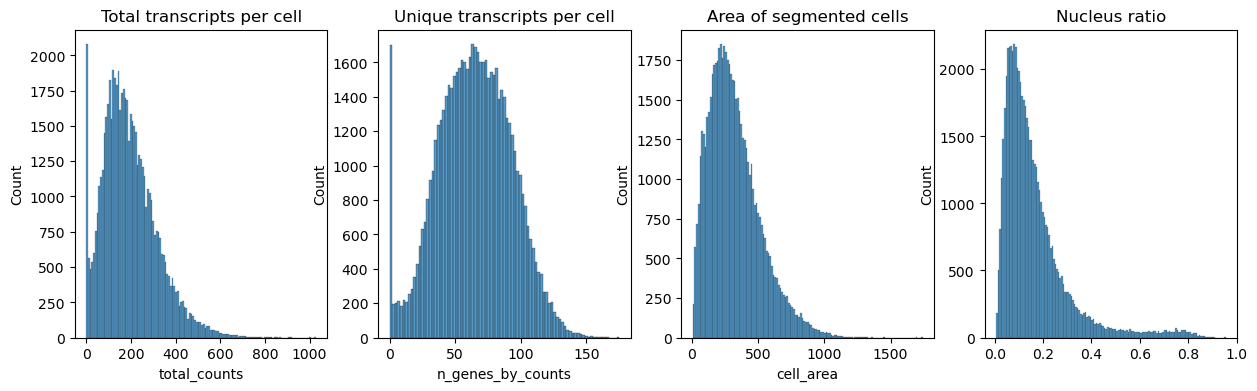

In [14]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))

axs[0].set_title("Total transcripts per cell")
sns.histplot(
    adata.obs["total_counts"],
    kde=False,
    ax=axs[0],
)

axs[1].set_title("Unique transcripts per cell")
sns.histplot(
    adata.obs["n_genes_by_counts"],
    kde=False,
    ax=axs[1],
)


axs[2].set_title("Area of segmented cells")
sns.histplot(
    adata.obs["cell_area"],
    kde=False,
    ax=axs[2],
)

axs[3].set_title("Nucleus ratio")
sns.histplot(
    adata.obs["nucleus_area"] / adata.obs["cell_area"],
    kde=False,
    ax=axs[3],
)

In [15]:
sc.pp.filter_cells(adata, min_counts=10)
sc.pp.filter_genes(adata, min_cells=5)

In [16]:
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


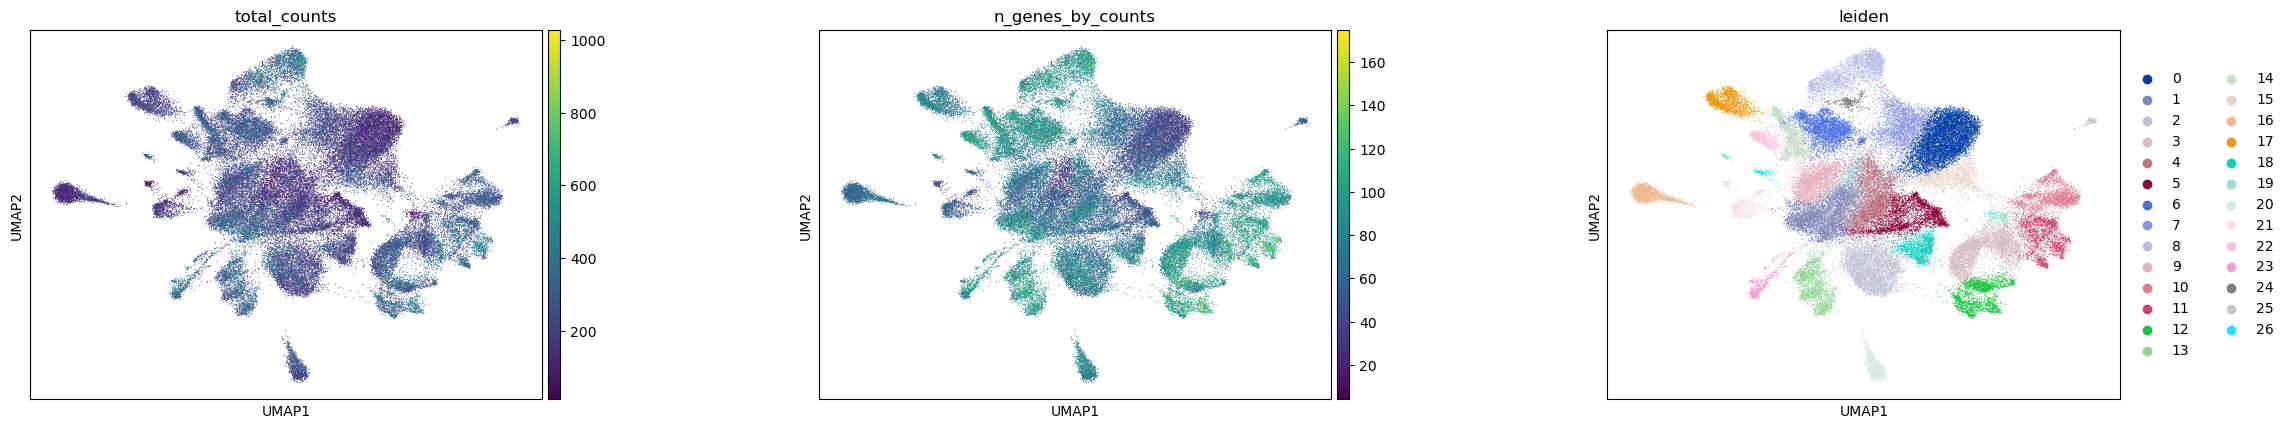

In [18]:
sc.pl.umap(
    adata,
    color=[
        "total_counts",
        "n_genes_by_counts",
        "leiden",
    ],
    wspace=0.4,
)

C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\squidpy\pl\_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\squidpy\pl\_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\squidpy\pl\_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
C:\Users\Acer\anaconda3\envs\f

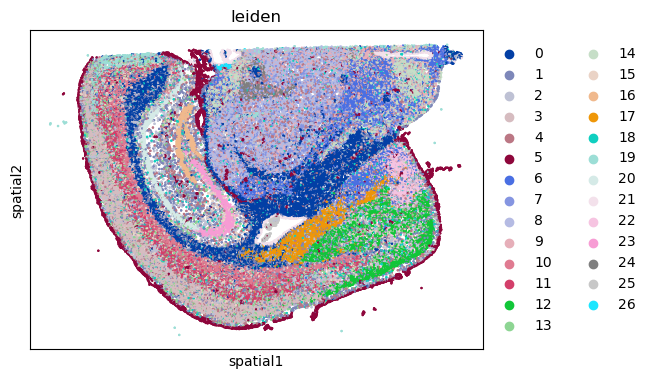

In [19]:
sq.pl.spatial_scatter(
    adata,
    library_id="spatial",
    shape=None,
    color=[
        "leiden",
    ],
    wspace=0.4,
)

C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


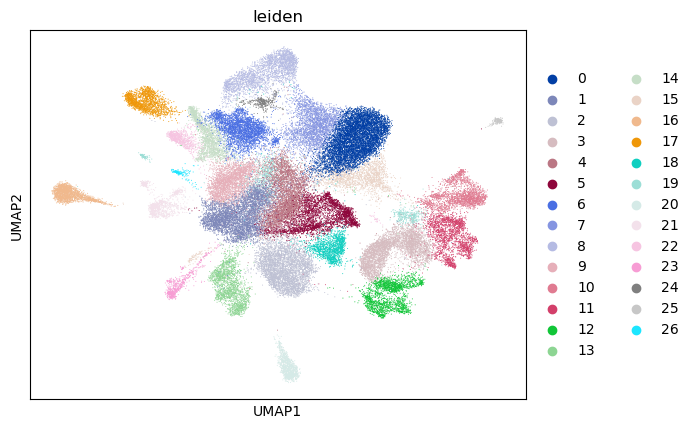

In [20]:
sc.pl.umap(
    adata,
    color=[
        "leiden"
    ],
    wspace=0.4,
)

C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


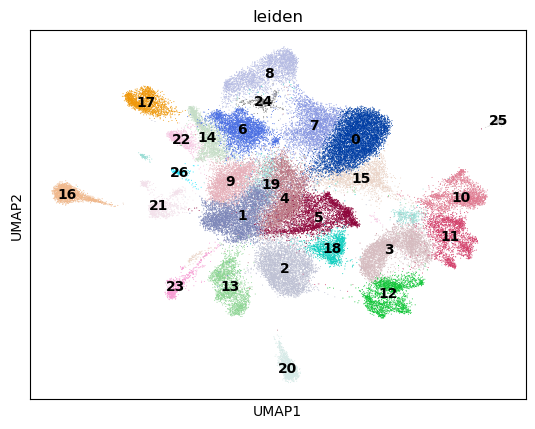

In [21]:
sc.pl.umap(
    adata,
    color=[
        "leiden"],
    legend_loc='on data',
    wspace=0.4,
)

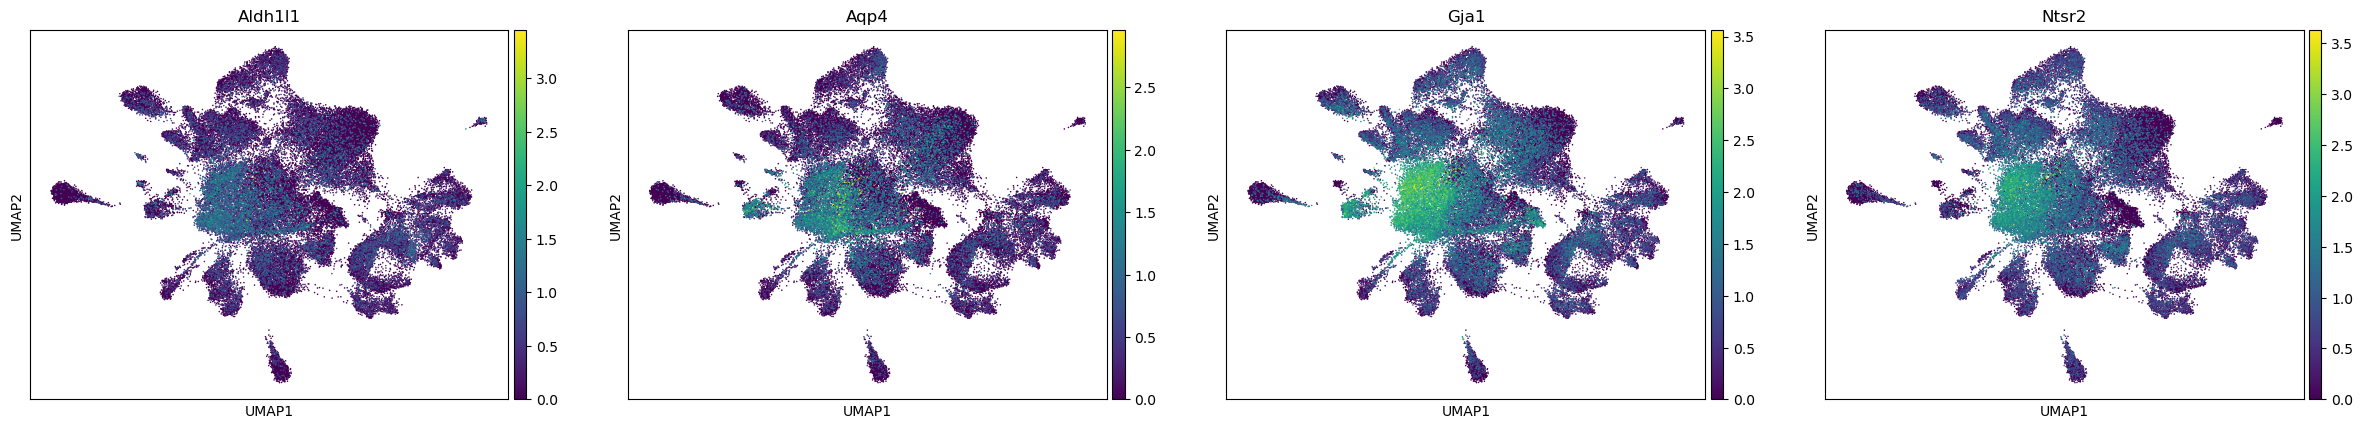

In [22]:
#Astrocytes
sc.pl.umap(adata,
           color=["Aldh1l1", "Aqp4", "Gja1", "Ntsr2"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

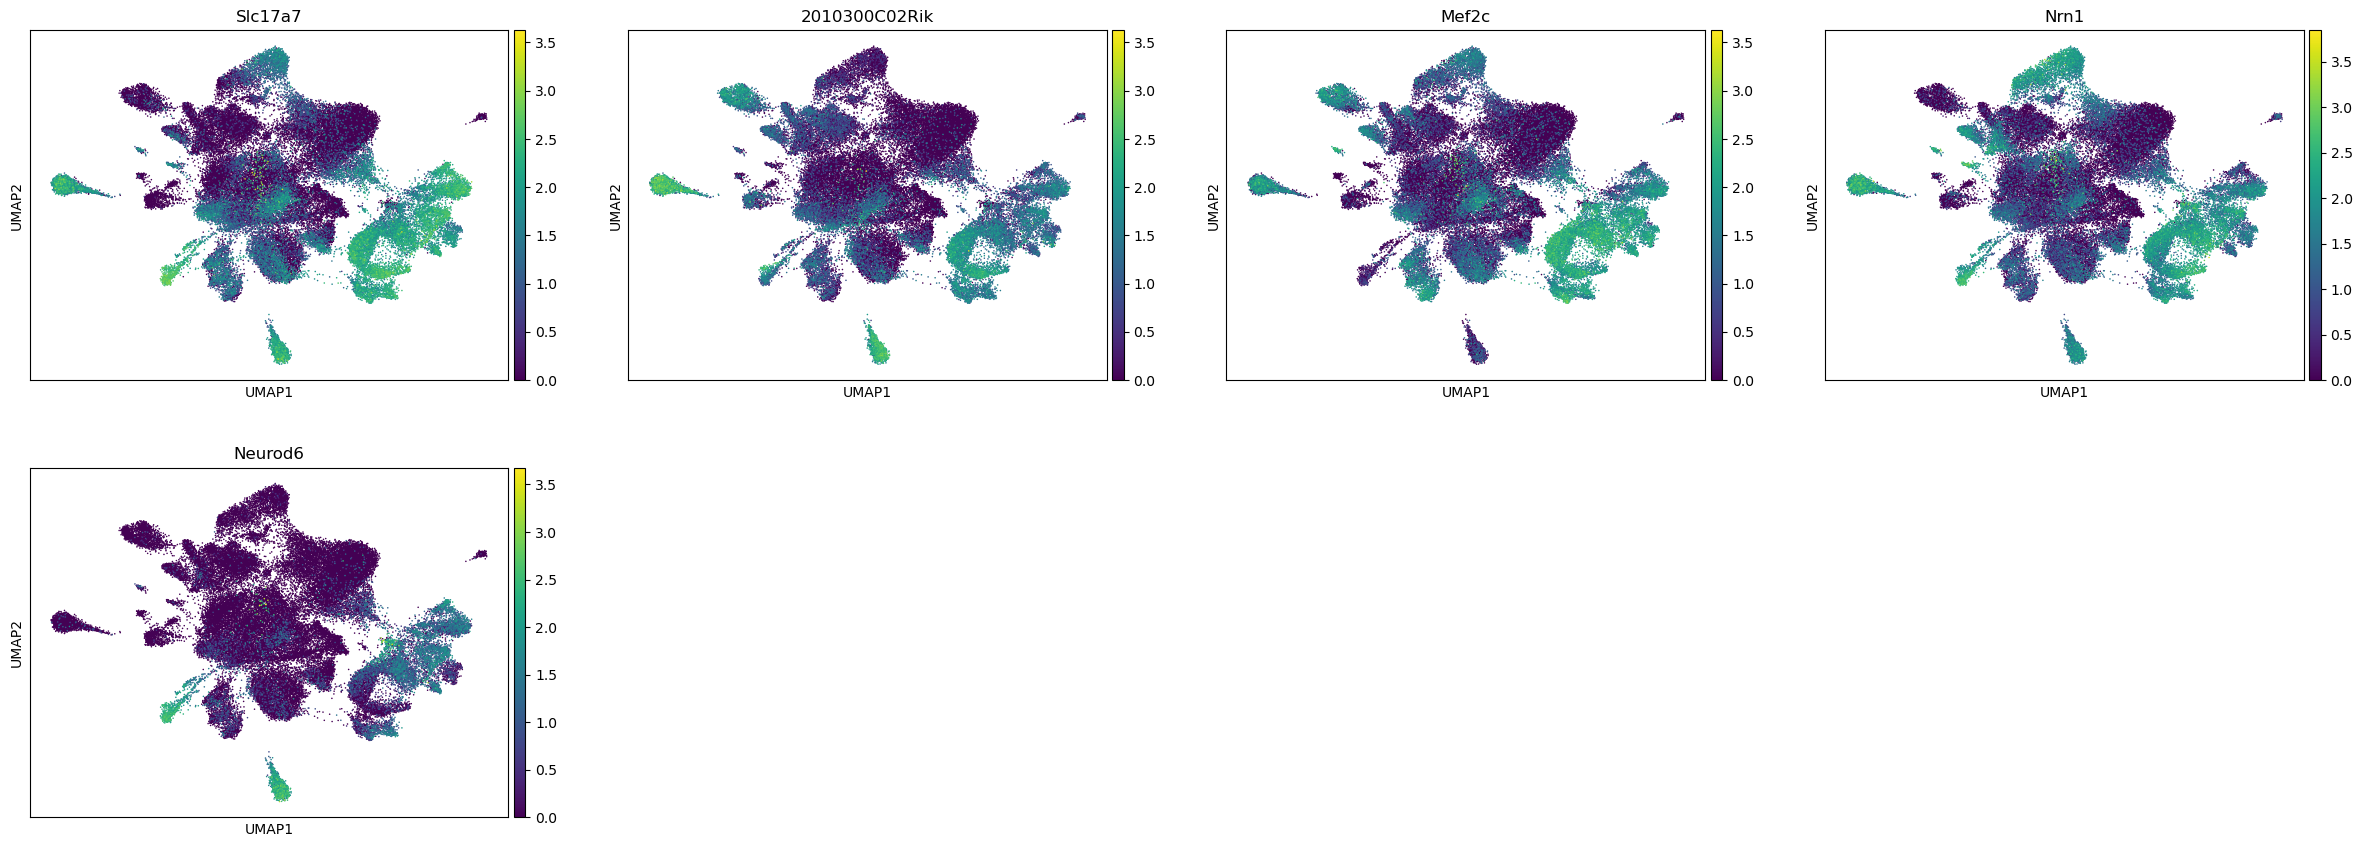

In [23]:
#Excitory Neurons
sc.pl.umap(adata,
           color=["Slc17a7", "2010300C02Rik", "Mef2c", "Nrn1", "Neurod6"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

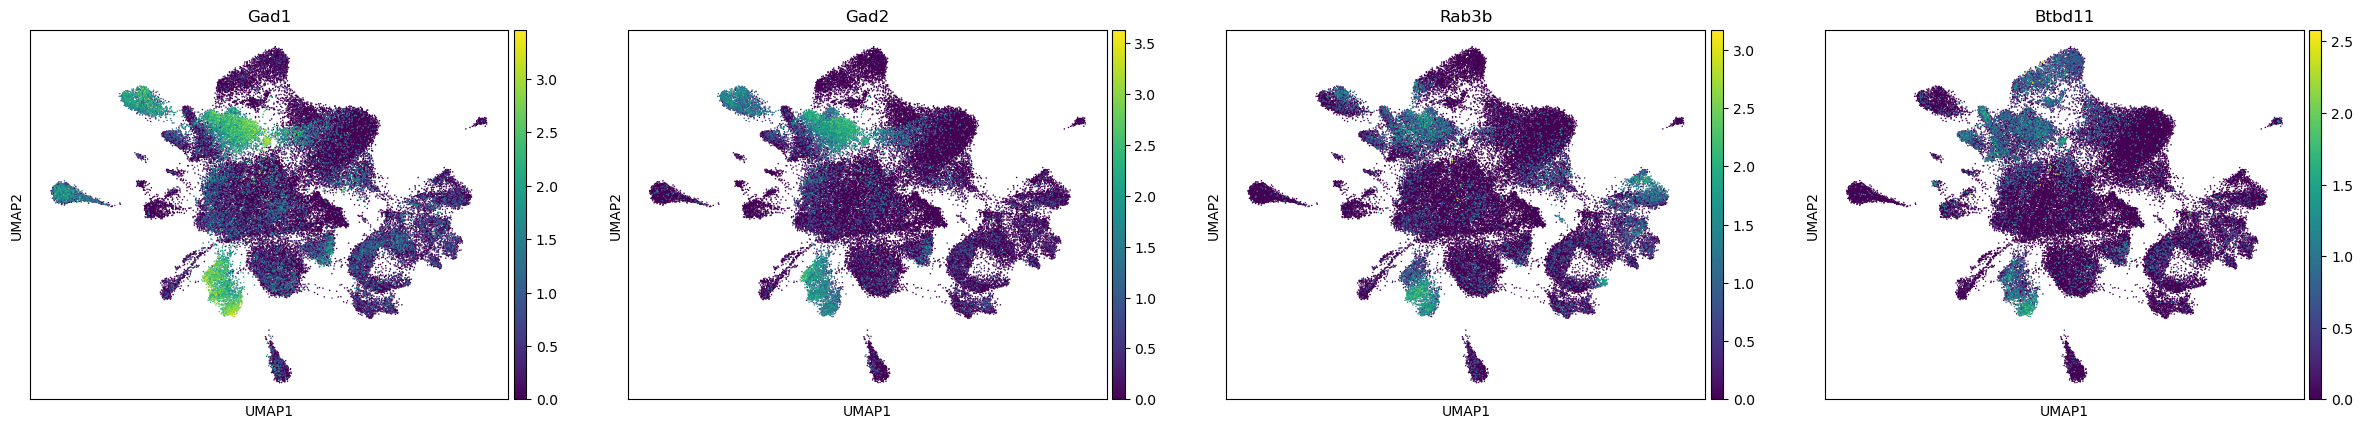

In [24]:
#Inhibitory Neurons
sc.pl.umap(adata,
           color=["Gad1", "Gad2", "Rab3b", "Btbd11"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

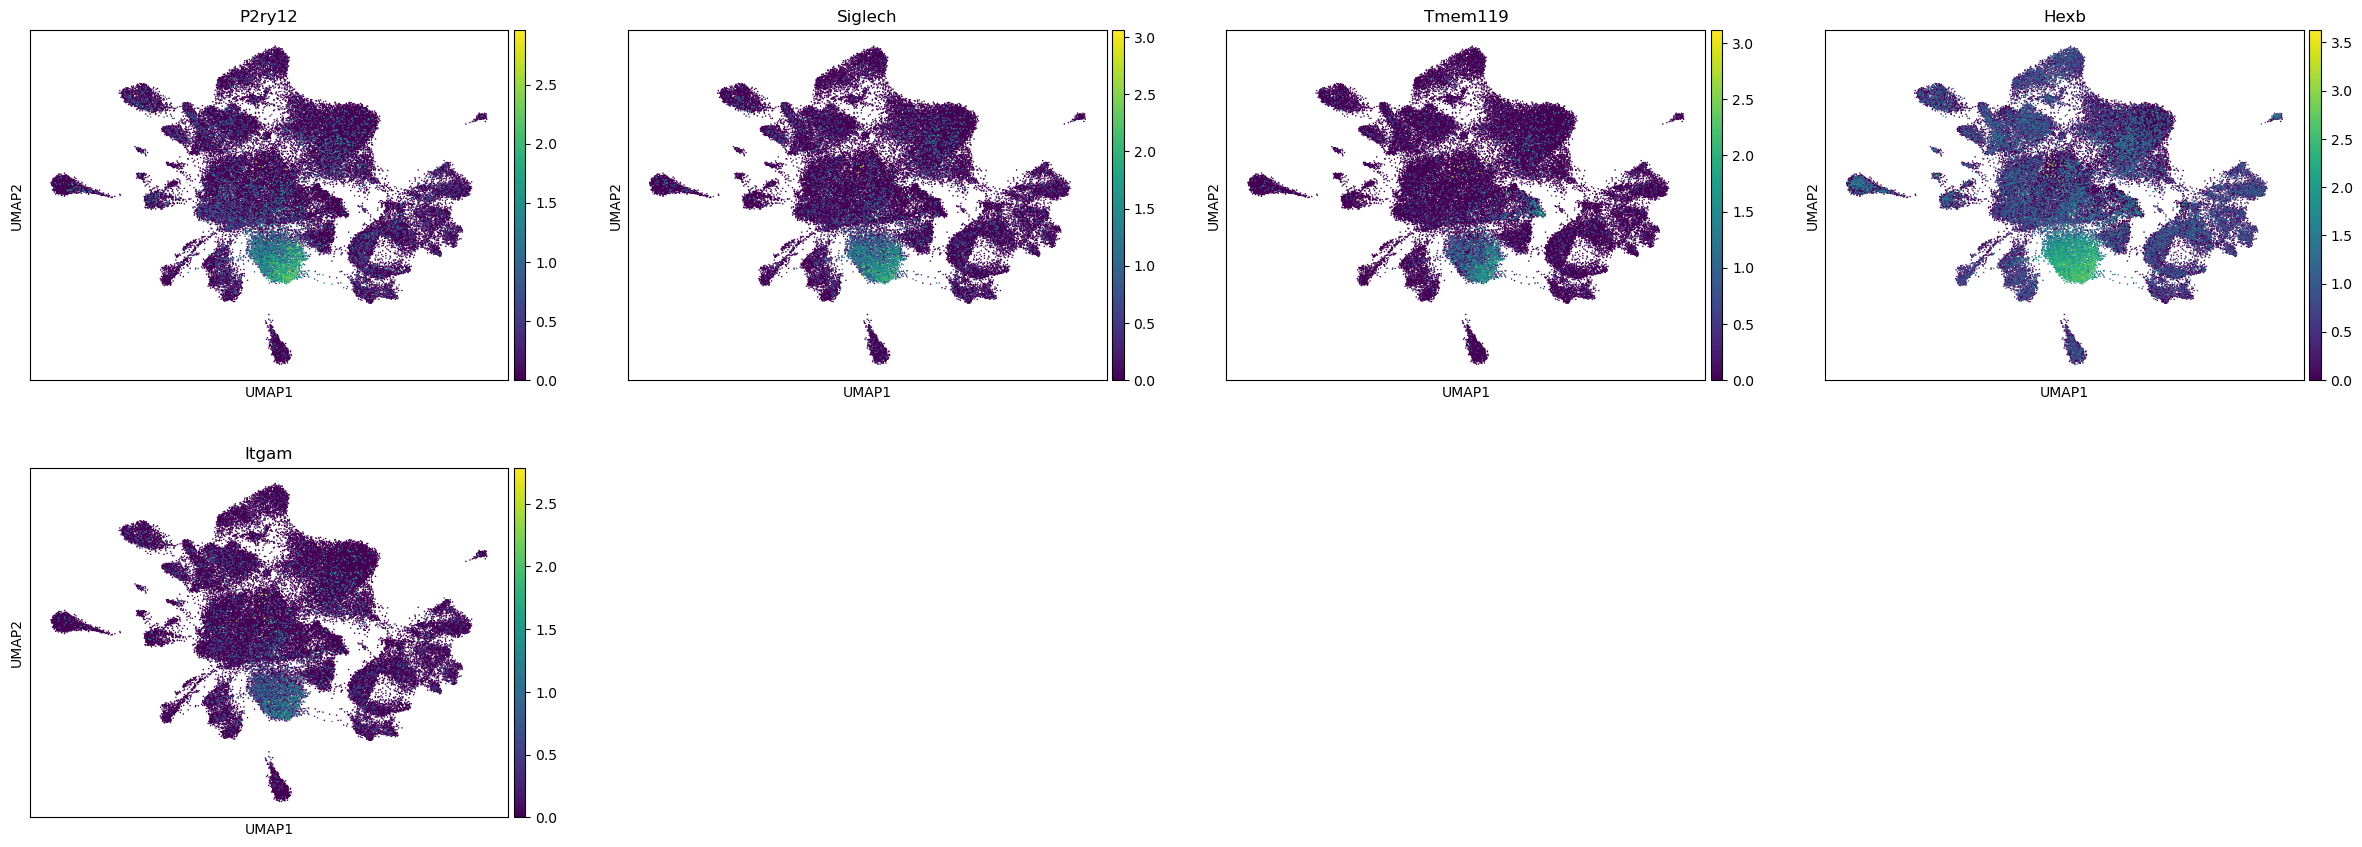

In [25]:
#Microglia
sc.pl.umap(adata,
           color=["P2ry12", "Siglech", "Tmem119", "Hexb", "Itgam"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

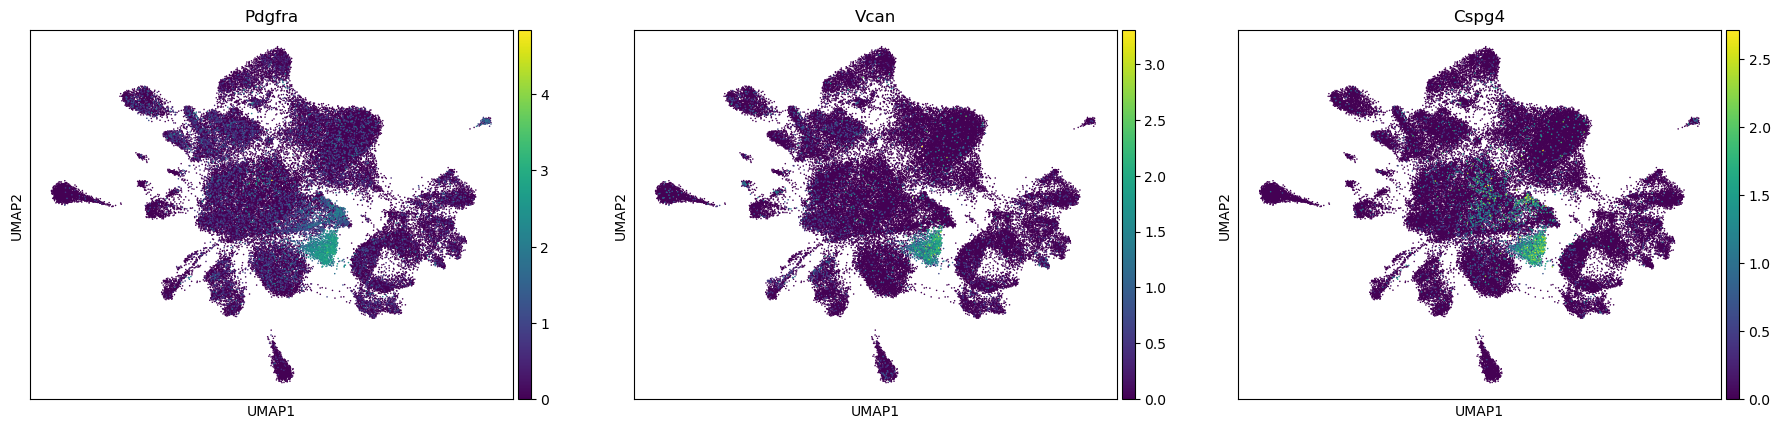

In [26]:
#OPC
sc.pl.umap(adata,
           color=["Pdgfra", "Vcan", "Cspg4"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

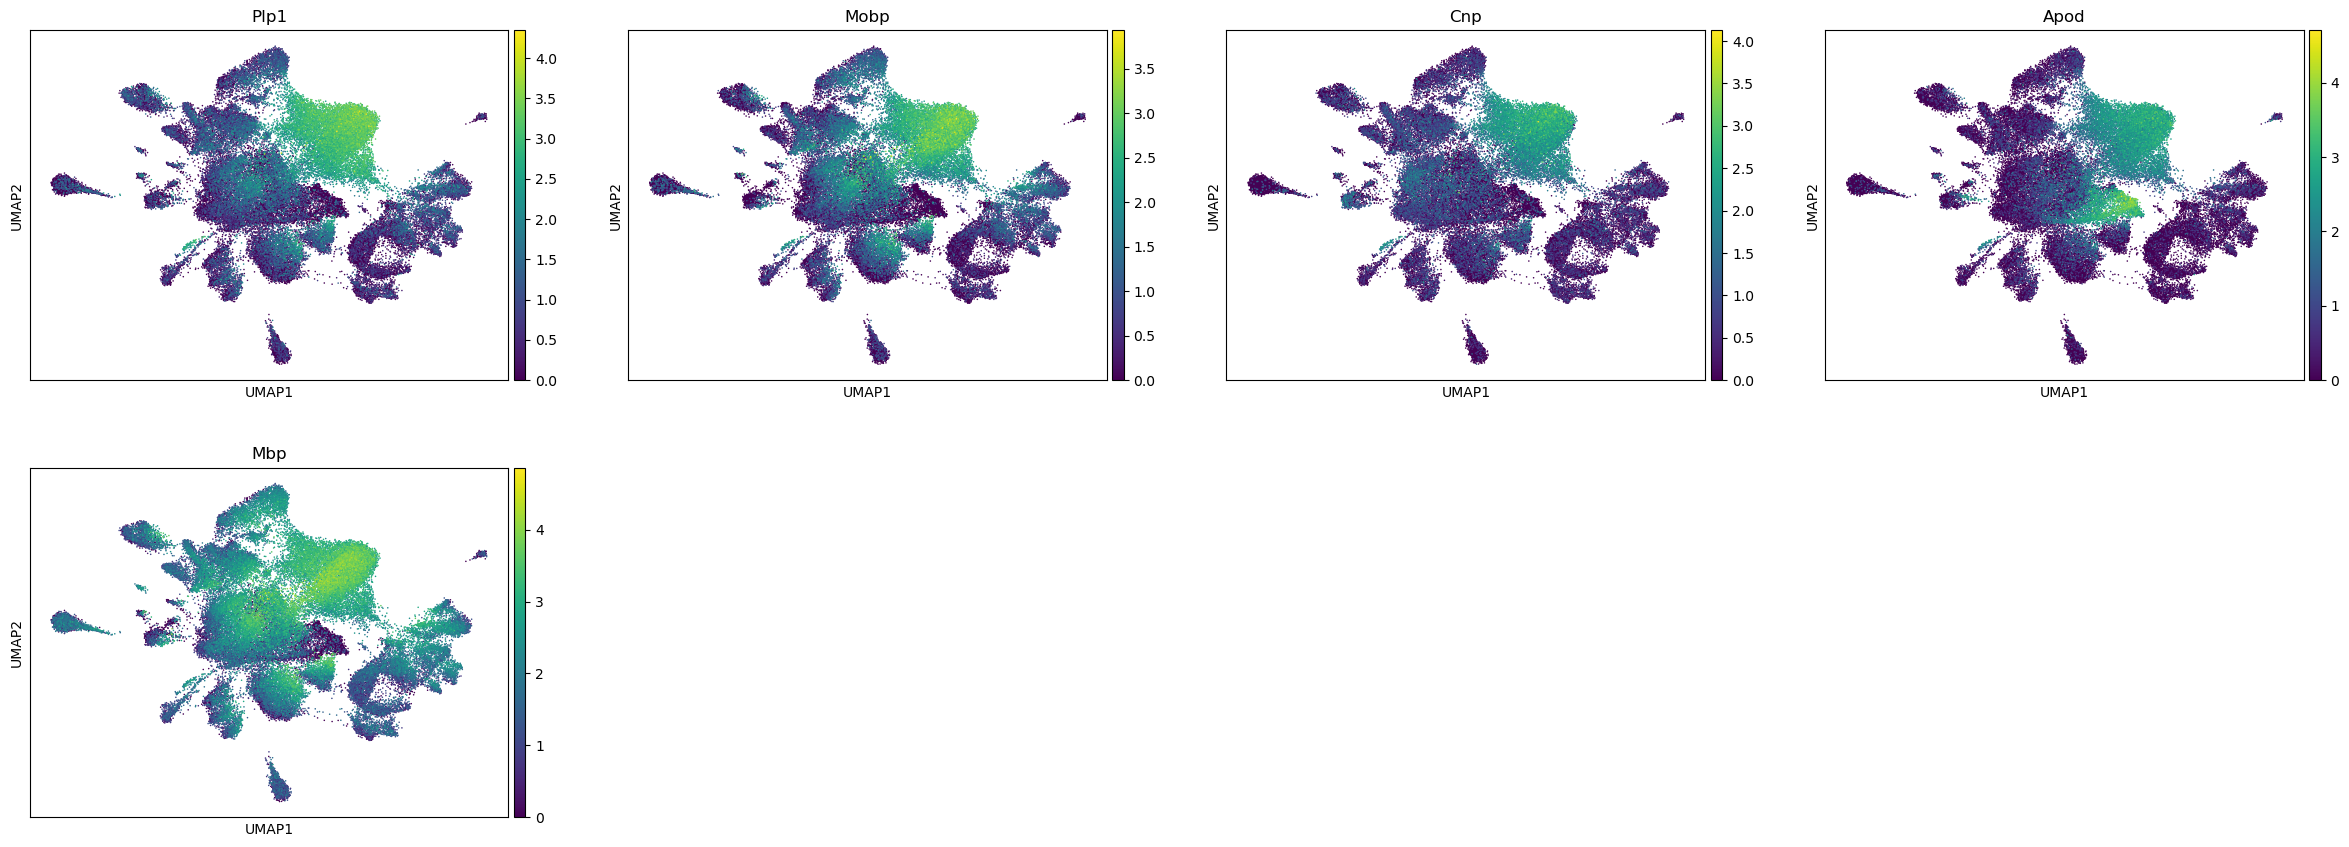

In [27]:
#Oligodendrocytes
sc.pl.umap(adata,
           color=["Plp1", "Mobp", "Cnp", "Apod", "Mbp"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

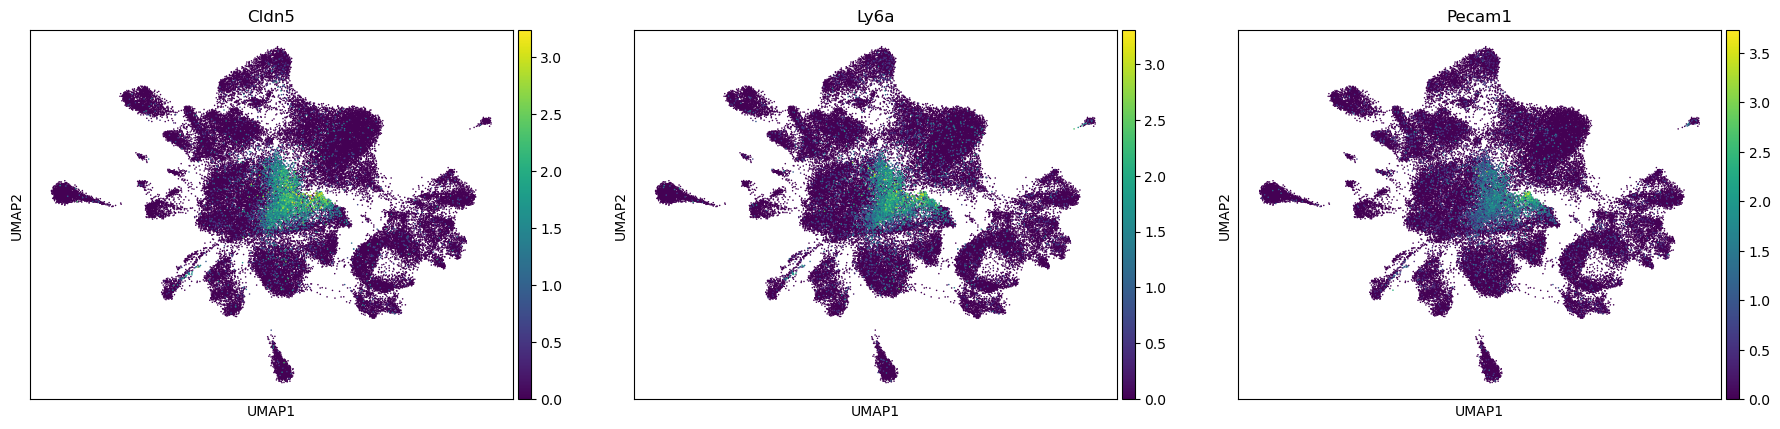

In [28]:
#Perciytes/Endothelial
sc.pl.umap(adata,
           color=["Cldn5", "Ly6a", "Pecam1"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

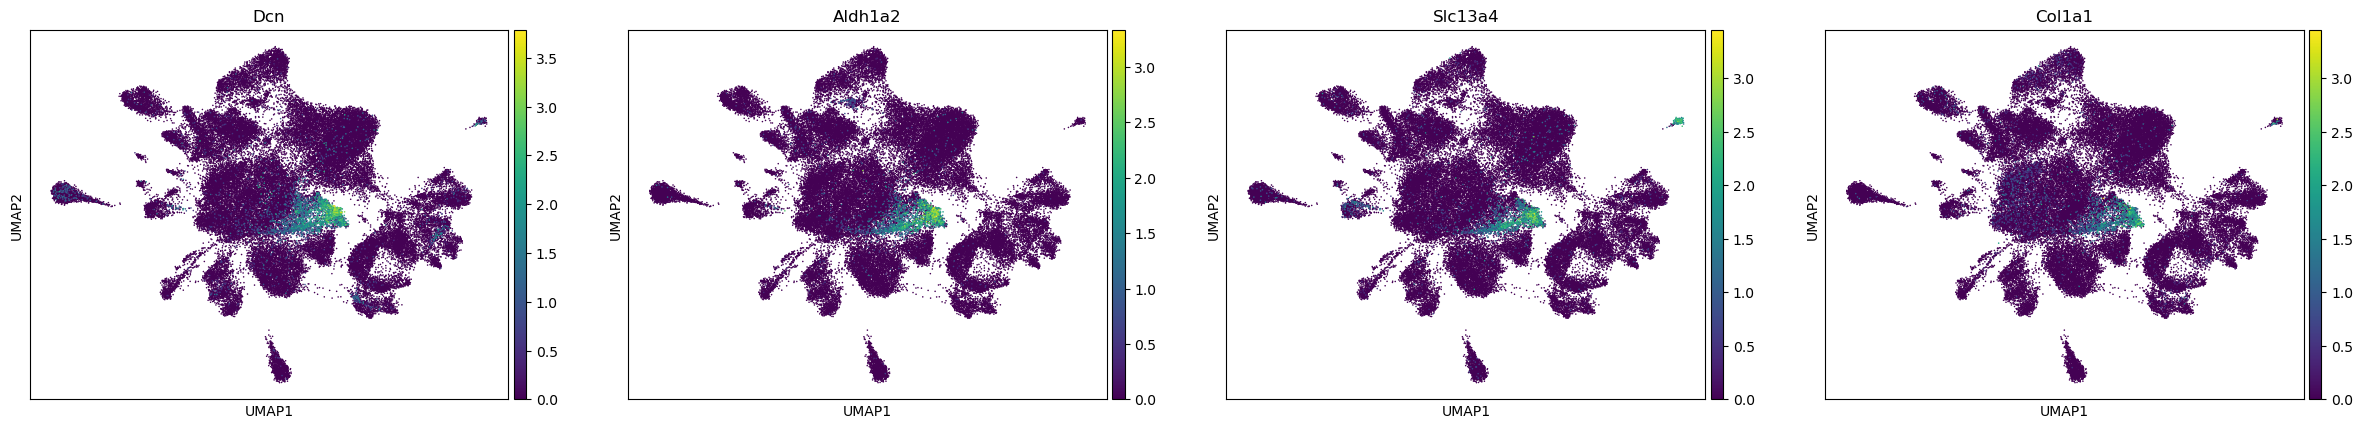

In [29]:
#Fibroblast
sc.pl.umap(adata,
           color=["Dcn", "Aldh1a2", "Slc13a4", "Col1a1"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

In [ ]:
# Assign cell type labels to single cells in adata
adata.obs["cell_type"] = adata.obs["leiden"].map(labels)

In [ ]:
adata.obs["cell_type"]

In [ ]:
sc.pl.umap(adata,
           color=['cell_type'],
           size=5,
           palette= "tab20")

C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\squidpy\pl\_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\squidpy\pl\_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\squidpy\pl\_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
C:\Users\Acer\anaconda3\envs\f

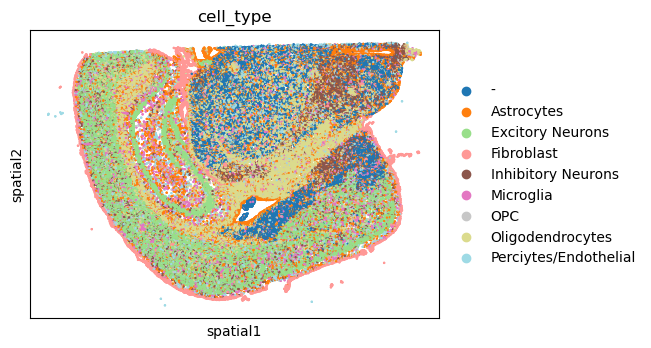

In [32]:
sq.pl.spatial_scatter(
    adata,
    library_id="spatial",
    shape=None,
    color=["cell_type"],
    wspace=0.4,
)

In [ ]:
adata

In [ ]:
adata.write("Xenium_TG_179.h5ad")

In [30]:
adata= sc.read_h5ad("Xenium_TG_179.h5ad")

In [31]:
adata

AnnData object with n_obs × n_vars = 60030 × 347
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'leiden', 'cell_type'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'cell_type_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'